In [34]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from scipy import linalg
from scipy.sparse import coo_matrix
from sys import getsizeof

In [81]:
def Amatrix(nx, sigma):
    D = numpy.diag((2.0 + 1.0 / sigma) * numpy.ones(nx))
    D[-1,-1] = 1+1.0/sigma #last element due to Neumann bc.
    U = numpy.diag(-1.0*numpy.ones(nx-1), k=1)
    L = numpy.diag(-1.0*numpy.ones(nx-1), k=-1)
    A = D + U + L
    print(str(getsizeof(A)))
    return A

def RHS(dx, q, T, sigma):
    b = T[1:-1]/sigma 
    b[0] = b[0] + T[0]
    b[-1] = b[-1] + q*dx
    return b
    

In [82]:
def implicit(dx, dt,nt, nx, sigma,q,T0):
    A = Amatrix(nx-2, sigma)
    T = T0.copy()
    for n in range(1,nt):
        b = RHS(dx, q, T, sigma)
        T[1:-1] = linalg.solve(A,b)
        T[-1] = T[-2] + q*dx
    return T

In [83]:
L = 1.0
nx = 51
dx = L/(nx-1)
alpha = 1.22e-3
q = 0.0
sigma =0.5
dt = sigma * dx**2 /alpha
nt = 1000
x = numpy.linspace(0.0,L, num=nx)

T0 = numpy.zeros(nx)
T0[0] = 100.0
T = implicit(dx, dt,nt, nx, sigma,q,T0)

19320


In [84]:
def plot(x,T):
    pyplot.figure(figsize=(6.0, 4.0))
    pyplot.xlabel('Distance [m]')
    pyplot.ylabel('Temperature [C]')
    pyplot.grid()
    pyplot.plot(x, T, color='C0', linestyle='-', linewidth=2)
    pyplot.xlim(0.0, L)
    pyplot.ylim(0.0, 100.0);

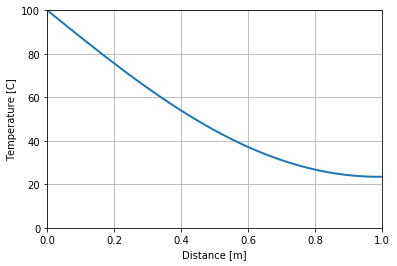

In [85]:
plot(x,T)

56


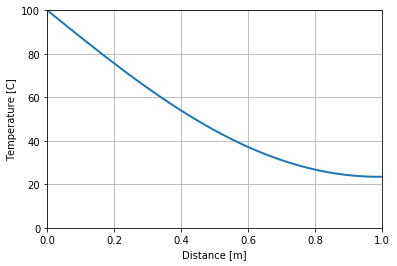

In [86]:
from scipy.sparse.linalg import spsolve
def ACoomatrix(nx, sigma):
    D = numpy.diag((2.0 + 1.0 / sigma) * numpy.ones(nx))
    D[-1,-1] = 1+1.0/sigma #last element due to Neumann bc.
    U = numpy.diag(-1.0*numpy.ones(nx-1), k=1)
    L = numpy.diag(-1.0*numpy.ones(nx-1), k=-1)
    A = D + U + L
    Asp = coo_matrix(A)
    print(str(getsizeof(Asp)))
    return Asp

def implicit_sparse(dx, dt,nt, nx, sigma,q,T0):
    A = ACoomatrix(nx-2, sigma)
    T = T0.copy()
    for n in range(1,nt):
        b = RHS(dx, q, T, sigma)
        T[1:-1] = spsolve(A,b)
        T[-1] = T[-2] + q*dx
    return T

Tsp = implicit_sparse(dx, dt,nt, nx, sigma,q,T0)
plot(x,Tsp)

In [77]:
from sys import getsizeof
a = 42
getsizeof(a)
a = 2**1000
getsizeof(D)


56

In [65]:
A=Amatrix(51, sigma)
getsizeof(A)

20920

In [70]:
D=coo_matrix(A)
getsizeof(D)
D[1,1]

TypeError: 'coo_matrix' object is not subscriptable